<a href="https://colab.research.google.com/github/rizkiulia/Pemograman-Web/blob/master/SVM%20Machine%20Learning%20on%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

training = pd.read_csv('train.csv')
testing =pd.read_csv('test.csv')

display(training)
print('\n')
display(testing)

index  daya_baterai  bluetooth  ...  touch_screen  wifi   price_range
0      1045           531          0  ...             1     0   2000k-3000k
1       937           764          1  ...             1     0   2000k-3000k
2      1658          1812          1  ...             1     1        >3000k
3       529          1821          0  ...             1     1   2000k-3000k
4       895          1790          1  ...             0     1        >3000k
...     ...           ...        ...  ...           ...   ...           ...
1495    835          1224          1  ...             1     0        >3000k
1496   1216          1158          0  ...             0     1  1000k-<2000k
1497   1653          1190          0  ...             0     1        >3000k
1498    559          1191          0  ...             1     1      0-<1000k
1499    684           706          0  ...             0     1  1000k-<2000k

[1500 rows x 22 columns]

index  daya_baterai  bluetooth  ...  three_g  touch_screen  wifi
0      405          1454          1  ...        1             1     0
1     1190          1092          1  ...        0             1     0
2     1132          1524          1  ...        1             0     1
3      731          1807          1  ...        0             1     1
4     1754          1086          1  ...        1             1     0
..     ...           ...        ...  ...      ...           ...   ...
495    936           805          0  ...        1             0     1
496   1524          1162          0  ...        1             1     1
497   1415          1759          1  ...        1             1     0
498   1223           514          1  ...        1             1     1
499   1548          1410          1  ...        1             1     0

[500 rows x 21 columns]

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1450 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   object 
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1381 non-null   float64
 16  lebar_

In [ ]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               500 non-null    int64  
 1   daya_baterai        500 non-null    int64  
 2   bluetooth           500 non-null    int64  
 3   kecepatan_clock     500 non-null    float64
 4   dual_sim            500 non-null    int64  
 5   kamera_depan        500 non-null    int64  
 6   four_g              500 non-null    object 
 7   memori_internal     500 non-null    int64  
 8   tebal_hp            500 non-null    float64
 9   berat_hp            500 non-null    int64  
 10  jumlah_prosesor     500 non-null    int64  
 11  kamera_belakang_mp  500 non-null    int64  
 12  px_panjang          500 non-null    int64  
 13  px_lebar            500 non-null    int64  
 14  kapasitas_ram       500 non-null    int64  
 15  panjang_layar       500 non-null    int64  
 16  lebar_la

In [ ]:
def null_table(training, testing):
  print('Training:')
  print(pd.isnull(training).sum())
  print('')
  print('Testing:')
  print(pd.isnull(testing).sum())

null_table(training, testing)

Training:
index                   0
daya_baterai            0
bluetooth               0
kecepatan_clock        50
dual_sim                0
kamera_depan            0
four_g                  0
memori_internal         0
tebal_hp                0
berat_hp                0
jumlah_prosesor         0
kamera_belakang_mp      0
px_panjang              0
px_lebar                0
kapasitas_ram           0
panjang_layar         119
lebar_layar             0
waktu_telfon            0
three_g                 0
touch_screen            0
wifi                    0
price_range             0
dtype: int64

Testing:
index                 0
daya_baterai          0
bluetooth             0
kecepatan_clock       0
dual_sim              0
kamera_depan          0
four_g                0
memori_internal       0
tebal_hp              0
berat_hp              0
jumlah_prosesor       0
kamera_belakang_mp    0
px_panjang            0
px_lebar              0
kapasitas_ram         0
panjang_layar         0
lebar_layar

In [ ]:
#training['kecepatan_clock'] = training['kecepatan_clock'].replace('-', np.nan, inplace=True)
#training['panjang_layar'] = training['panjang_layar'].replace('-', np.nan, inplace=True)
training['kecepatan_clock'] = training['kecepatan_clock'].fillna(training['kecepatan_clock'].mean())
training['panjang_layar'] = training['panjang_layar'].fillna(training['panjang_layar'].mean())

#training['kecepatan_clock'] = training['kecepatan_clock'].astype(float)
#training['panjang_layar'] = training['panjang_layar'].astype(float)

In [ ]:
training['four_g'] = training['four_g'].replace({'Tidak':0, 'Ya':1})
training['price_range'] = training['price_range'].replace({'0-<1000k':0, '1000k-<2000k':1, '2000k-3000k':2, '>3000k':3})

testing['four_g'] = testing['four_g'].replace({'Tidak':0, 'Ya':1})

In [ ]:
display(training.head())
display(testing.head())

index  daya_baterai  bluetooth  ...  touch_screen  wifi  price_range
0   1045           531          0  ...             1     0            2
1    937           764          1  ...             1     0            2
2   1658          1812          1  ...             1     1            3
3    529          1821          0  ...             1     1            2
4    895          1790          1  ...             0     1            3

[5 rows x 22 columns]

index  daya_baterai  bluetooth  ...  three_g  touch_screen  wifi
0    405          1454          1  ...        1             1     0
1   1190          1092          1  ...        0             1     0
2   1132          1524          1  ...        1             0     1
3    731          1807          1  ...        0             1     1
4   1754          1086          1  ...        1             1     0

[5 rows x 21 columns]

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1500 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   int64  
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1500 non-null   float64
 16  lebar_

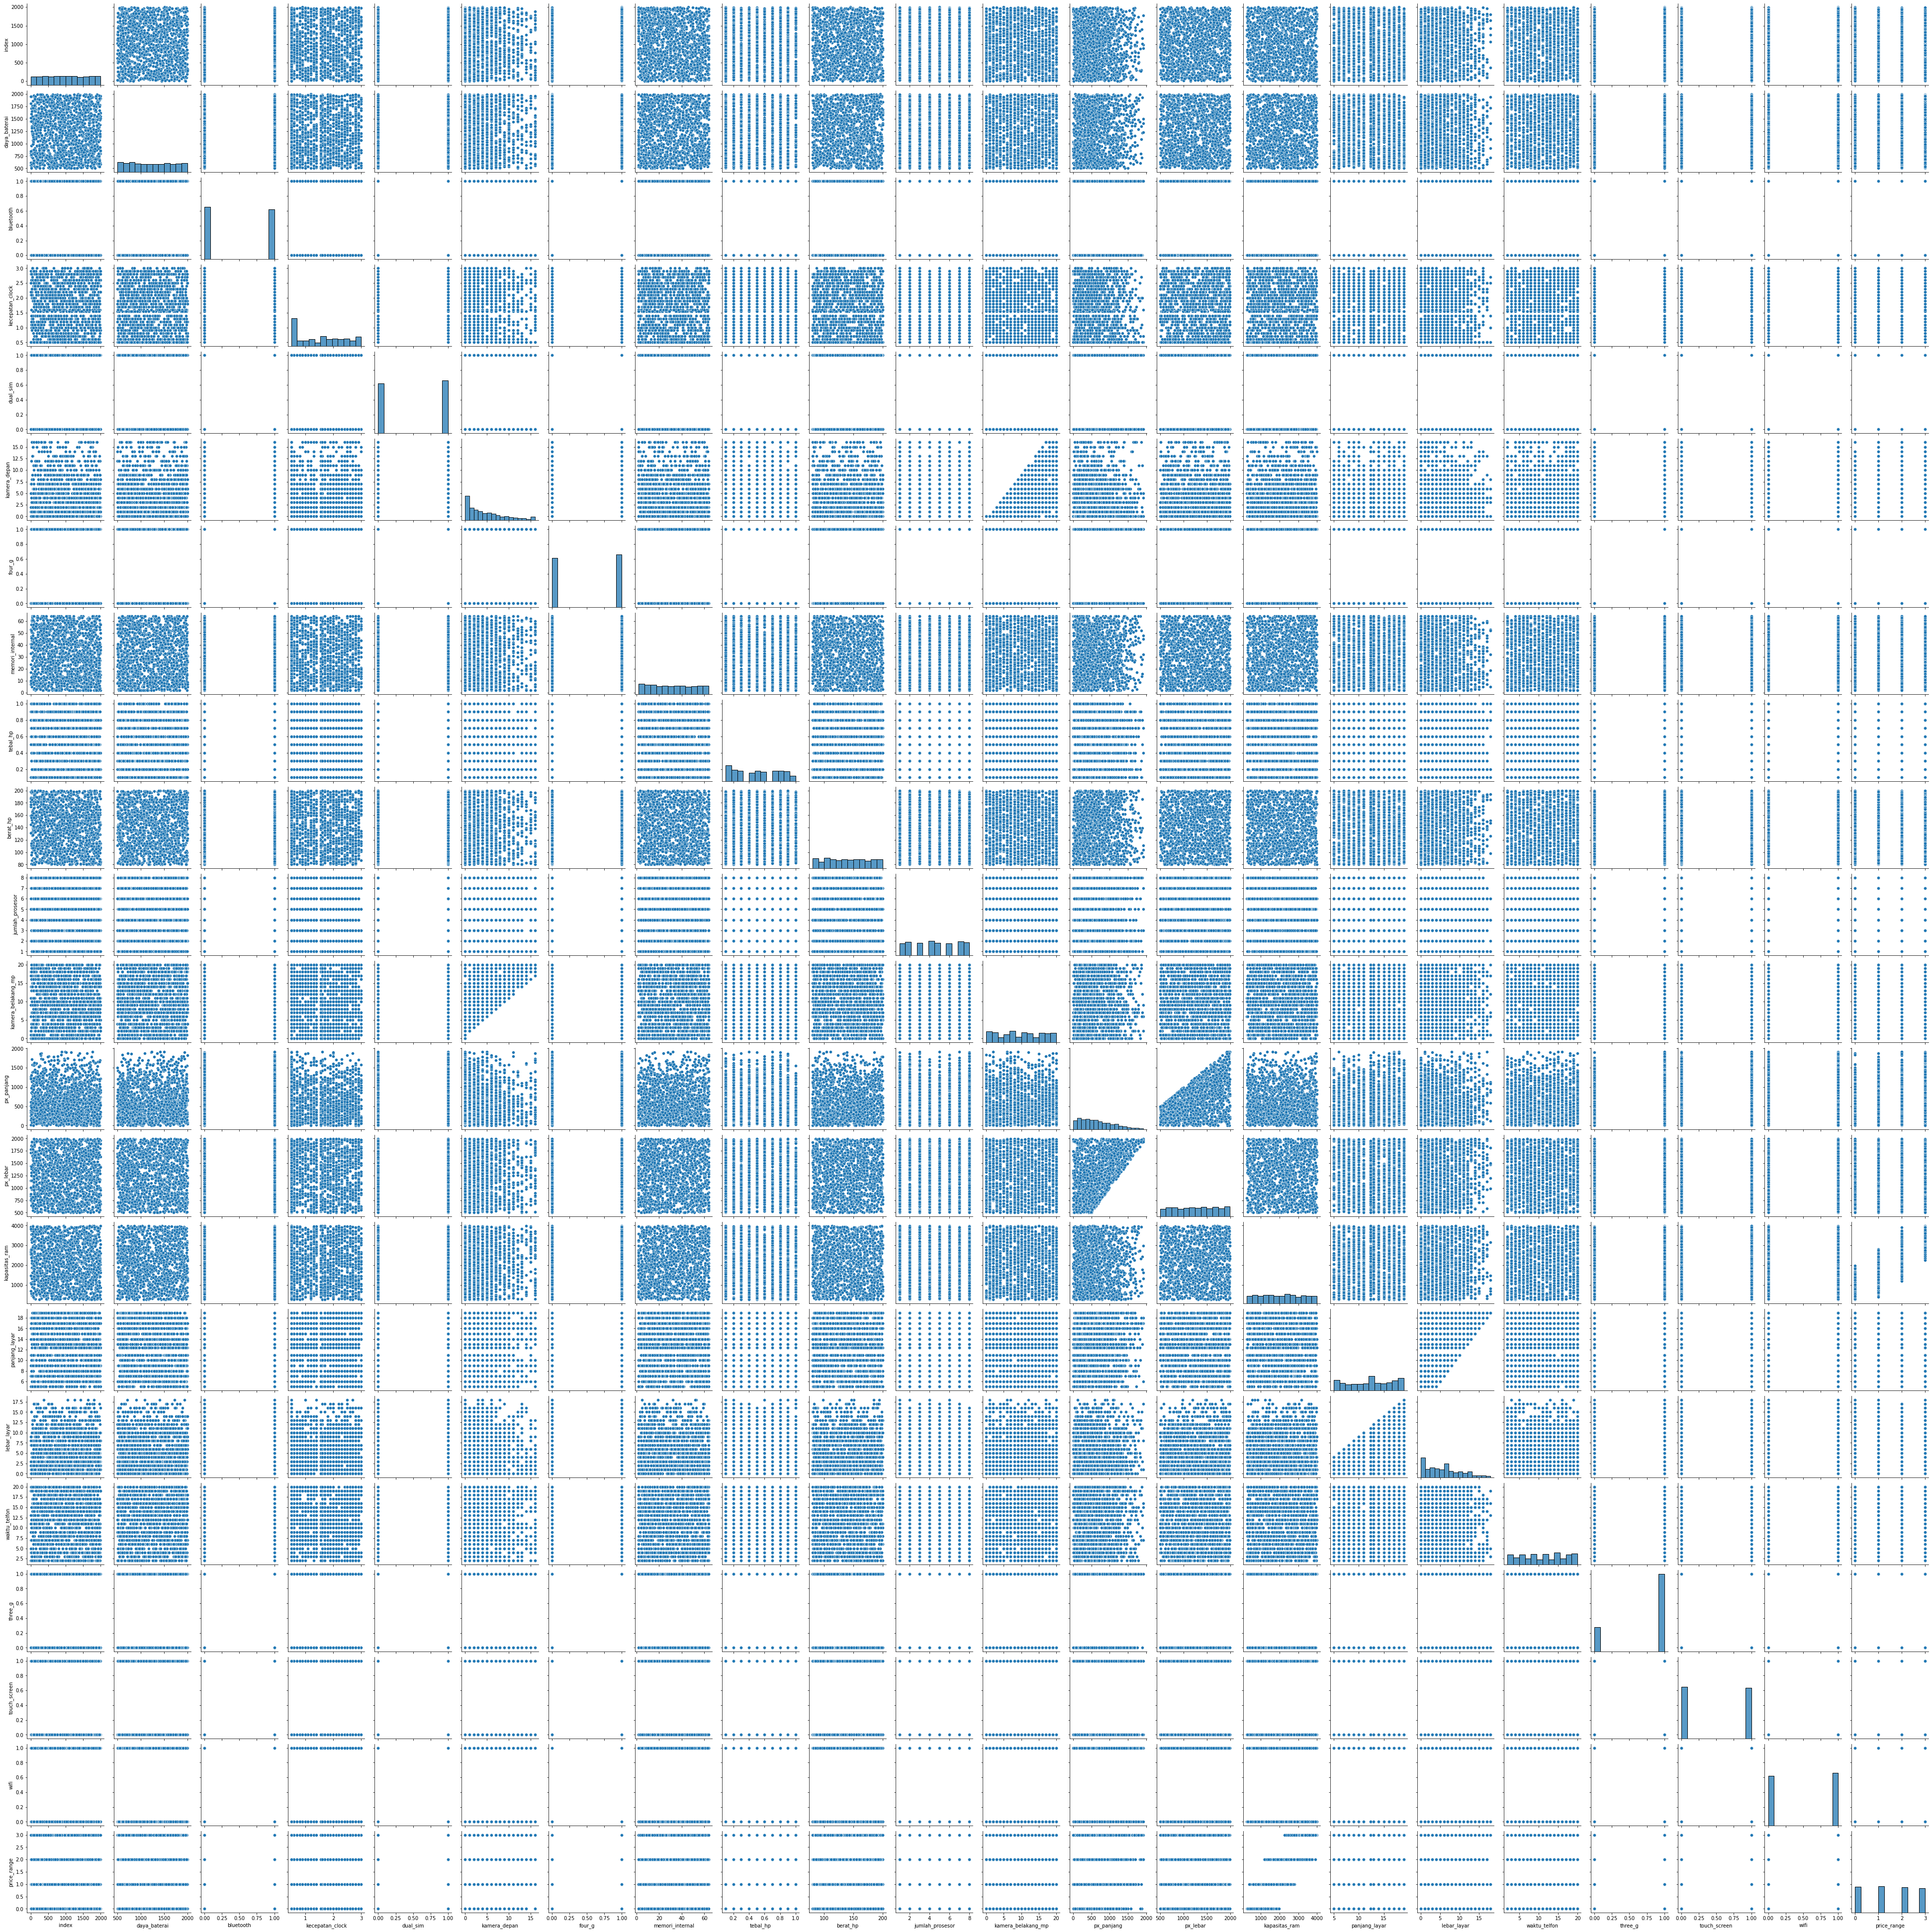

In [ ]:
import seaborn as sns

sns.pairplot(training)

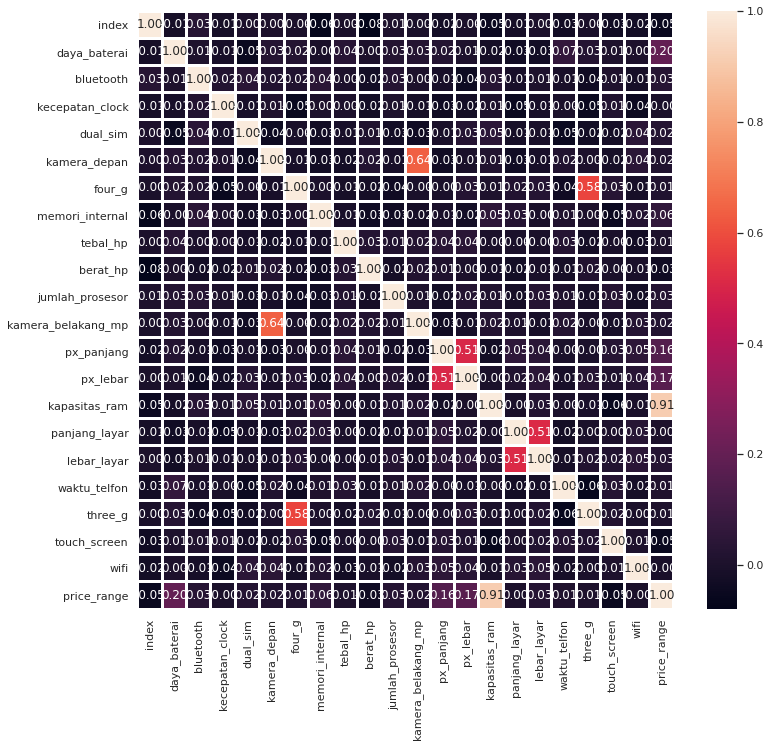

In [ ]:
sns.set(rc={'figure.figsize': (12,11)})
sns.heatmap(training.corr(), annot=True, fmt='.2f', linewidth=2)

In [ ]:
X = training.drop(['price_range'], axis=1)
y = training['price_range']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1500 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   int64  
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1500 non-null   float64
 16  lebar_

In [ ]:
X.iloc[:,:].values

array([[1.045e+03, 5.310e+02, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [9.370e+02, 7.640e+02, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.658e+03, 1.812e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.653e+03, 1.190e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [5.590e+02, 1.191e+03, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [6.840e+02, 7.060e+02, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [ ]:
from sklearn.preprocessing import StandardScaler

cols = X.columns
cols2 = testing.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(testing)

X = pd.DataFrame(X, columns = cols)
X_test = pd.DataFrame(testing, columns= cols2)


In [ ]:
X.head()

index  daya_baterai  bluetooth  ...   three_g  touch_screen      wifi
0  0.068396     -1.589547  -0.976281  ... -1.779513      1.010724 -1.028403
1 -0.119240     -1.062043   1.024295  ...  0.561951      1.010724 -1.028403
2  1.133405      1.310596   1.024295  ...  0.561951      1.010724  0.972381
3 -0.828088      1.330972  -0.976281  ...  0.561951      1.010724  0.972381
4 -0.192210      1.260789   1.024295  ...  0.561951     -0.989390  0.972381

[5 rows x 21 columns]

In [ ]:
X_test.head()

index  daya_baterai  bluetooth  ...  three_g  touch_screen  wifi
0    405          1454          1  ...        1             1     0
1   1190          1092          1  ...        0             1     0
2   1132          1524          1  ...        1             0     1
3    731          1807          1  ...        0             1     1
4   1754          1086          1  ...        1             1     0

[5 rows x 21 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

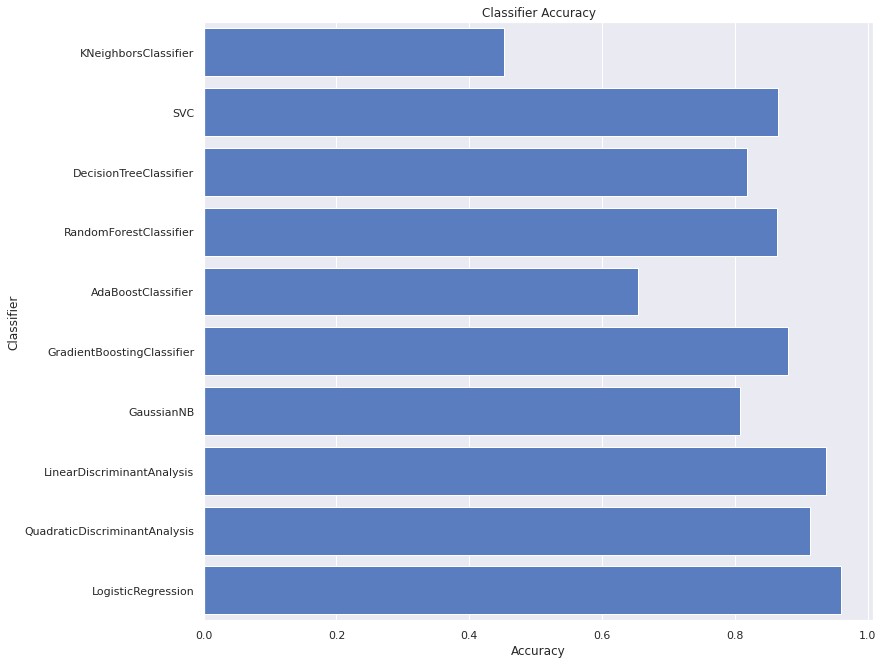

In [ ]:
classifiers = [
               KNeighborsClassifier(3),
               SVC(probability=True),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               GaussianNB(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis(),
               LogisticRegression()
]

log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns= log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = X.iloc[:, :].values
y = y.values

acc_dict = {}

for train_index, test_index in sss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
      acc_dict[name] += acc
    else:
      acc_dict[name] = acc

for clf in acc_dict:
  acc_dict[clf] = acc_dict[clf] / 10.0
  log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
  log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes('muted')
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

model_rf = RandomForestClassifier()
param_grid = {'n_estimators':[100, 200, 300, 400, 500], 'criterion':['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'bootstrap': [True, False], 'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'class_weight': ['balanced', 'balanced_subsample'],
              'min_samples_leaf': [1,2,3,4,5]}

rscv = RandomizedSearchCV(model_rf, param_grid, cv=10, scoring = 'f1_micro')

rscv.fit(X,y)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
rscv.best_params_

{'bootstrap': False,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 400}

In [ ]:
rscv.best_score_

0.8799999999999999

In [ ]:
model_rf = rscv.best_estimator_

In [ ]:
y_predict = model_rf.predict(testing)
y_predict

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
submission = pd.DataFrame({'index':testing['index'], 'price_range': y_predict})
submission.to_csv('submission.csv', index=False)